In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Prorblem 1a

In [2]:
# define a quadratic function

def f(x,a,b):
    return a + b*np.power(x,2)

# defining the exact derivative
def df(x,a,b):
    return b*2*x

#defing forward numerical derivative
def dfn(x,a,b,h):
    return (f(x+h,a,b)-f(x,a,b))/h

#defing central difference numerical derivative
def dfc(x,a,b,h):
    return (f(x+h,a,b)-f(x-h,a,b))/(2*h)


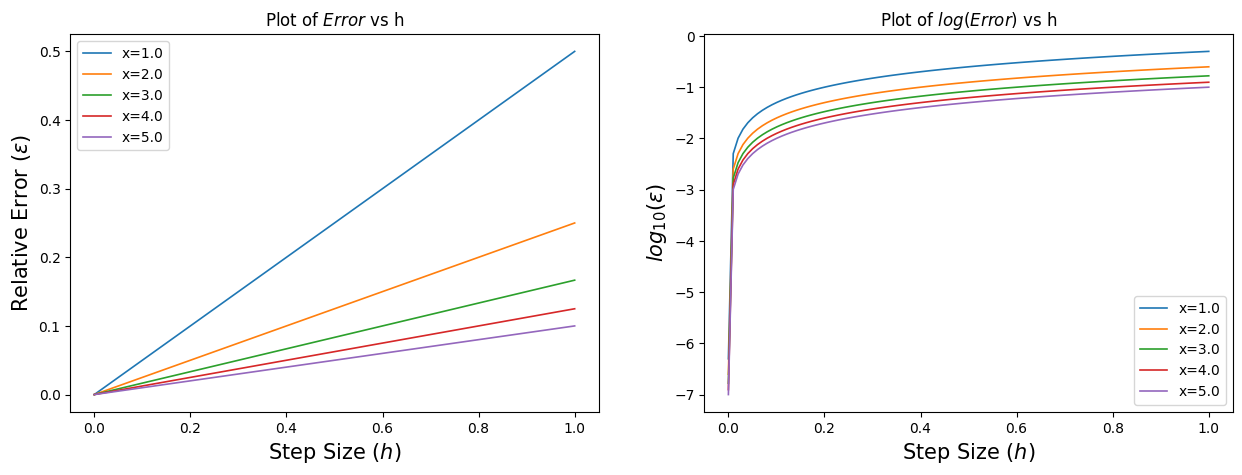

In [3]:
# selecting a and b
a = 1
b = 1

#defing array of x values
X = np.linspace(1,5,5)

# defining array of h values
H = np.linspace(1e-6,1,100)

#initilaizing the figure
fig,ax = plt.subplots(1,2,figsize=(15,5), dpi=100)

#calulting the require results for differnt values of x
for x in X:
    #calulating array of exact derivative for given x
    df_exact = df(x,a,b)

    error_array = np.zeros(len(H))
    
    i=0
    for h in H:
        dfn_exact = dfn(x,a,b,h) #Numerical Derivative
        #calulating (relative error) of forward numerical derivatives
        dferr_exact = abs((dfn_exact-df_exact)/df_exact)
        
        #storing the error for ploting
        error_array[i] = dferr_exact
        i=i+1
    log_error_array = np.log10(error_array) #calulating log(Relative error)

    #plotting error vs step Size(h)
    ax[0].plot(H, error_array,label='x='+str(x), lw=1.2)
    ax[1].plot(H, log_error_array,label='x='+str(x), lw=1.2)

# formatting the output
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Step Size $(h)$", fontsize=15);
ax[1].set_xlabel("Step Size $(h)$", fontsize=15);
ax[0].set_ylabel("Relative Error $(\epsilon)$", fontsize=15);
ax[1].set_ylabel("$log_{10}(\epsilon)$", fontsize=15);
ax[0].set_title("Plot of $Error$ vs h")
ax[1].set_title("Plot of $log(Error)$ vs h");

plt.savefig('error_vs_h_a.jpg', bbox_inches='tight', dpi=200)

Here we have plotted two diagram. In the first plot, we plotted the relative error, which clearly demonstrates the *linear Relationship* with the *step size*.      
In the second plot we plot the *log(error)*.

## Part (b)
Now we do the same thing using the central difference method.

<ipython-input-4-1e6d65272280>:33: RuntimeWarning: divide by zero encountered in log10
  log_error_array = np.log10(error_array) #calulating log(Relative error)
<ipython-input-4-1e6d65272280>:33: RuntimeWarning: divide by zero encountered in log10
  log_error_array = np.log10(error_array) #calulating log(Relative error)
<ipython-input-4-1e6d65272280>:33: RuntimeWarning: divide by zero encountered in log10
  log_error_array = np.log10(error_array) #calulating log(Relative error)
<ipython-input-4-1e6d65272280>:33: RuntimeWarning: divide by zero encountered in log10
  log_error_array = np.log10(error_array) #calulating log(Relative error)
<ipython-input-4-1e6d65272280>:33: RuntimeWarning: divide by zero encountered in log10
  log_error_array = np.log10(error_array) #calulating log(Relative error)


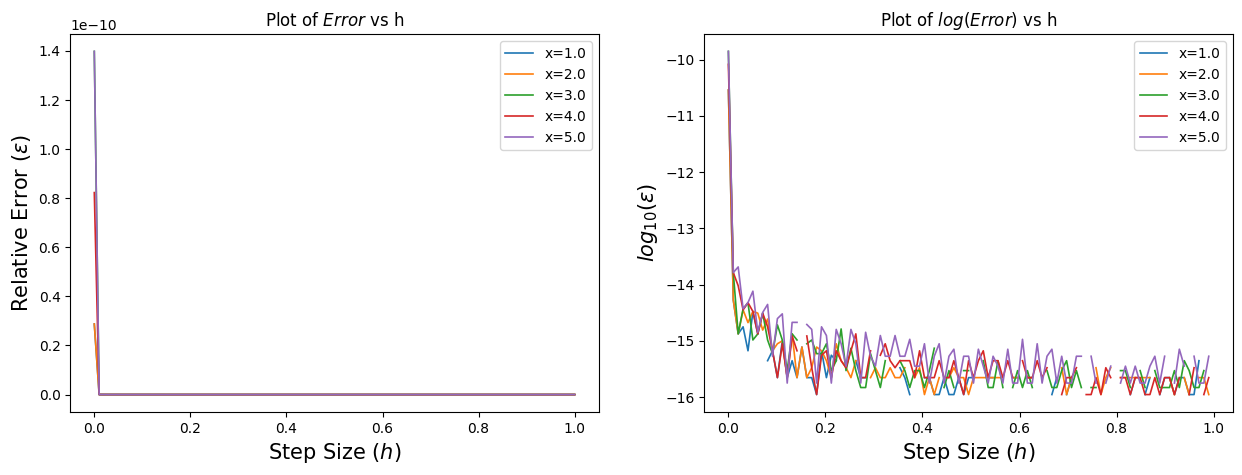

In [4]:
# Part b of the Worksheet
# using central difference method for computing the derivatives.

# selecting a and b
a = 1
b = 1

#defing array of x values
X = np.linspace(1,5,5)

# defining array of h values
H = np.linspace(1e-6,1,100)

#initilaizing the figure
fig,ax = plt.subplots(1,2,figsize=(15,5), dpi=100)

#calulting the require results for differnt values of x
for x in X:
    #calulating array of exact derivative for given x
    df_exact = df(x,a,b)

    error_array = np.zeros(len(H))
    
    i=0
    for h in H:
        dfn_exact = dfc(x,a,b,h) #Numerical Derivative
        #calulating (relative error) of forward numerical derivatives
        dferr_exact = abs((dfn_exact-df_exact)/df_exact)
        
        #storing the error for ploting
        error_array[i] = dferr_exact
        i=i+1
    log_error_array = np.log10(error_array) #calulating log(Relative error)

    #plotting error vs step Size(h)
    ax[0].plot(H, error_array,label='x='+str(x), lw=1.2)
    ax[1].plot(H, log_error_array,label='x='+str(x), lw=1.2)

# formatting the output
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Step Size $(h)$", fontsize=15);
ax[1].set_xlabel("Step Size $(h)$", fontsize=15);
ax[0].set_ylabel("Relative Error $(\epsilon)$", fontsize=15);
ax[1].set_ylabel("$log_{10}(\epsilon)$", fontsize=15);
ax[0].set_title("Plot of $Error$ vs h")
ax[1].set_title("Plot of $log(Error)$ vs h");

plt.savefig('error_vs_h_b.jpg', bbox_inches='tight', dpi=200)

In the above plot, we can see that the error is almost zero for the central difference method.
Also at some point  the error is zero, as we get runtime error for "divide by zero encountered in log10".       
So we can say cen central difference method is exact for quadratic functions.

# Now we solve for part(c)

In [5]:
# defing functions for 3rd part of worksheet

#defing exponential function
def f(x):
    return np.exp(x)

#defining the numerical second derivative
def df_2n(x,h):
    return (f(x+h)+f(x-h) - 2*f(x))/(h**2)


In [6]:
#defining x values
X = np.linspace(1,10,10)

# defining array of h values
H = np.array([1e-6,1e-5,1e-4,1e-3,1e-2,1e-1])

df_array  = [] #array for creating the dataframe for shoing the table
er_array  = [] #array for storing the error values
rel_array = [] #array for storing the relative error values

for x in X:
    df_exact = f(x)
    val_array = [df_exact] #values array with first element being the exact second derivative
    error_array = [] #error array for storing the error values for fixed x and varying h
    rel_error_array = [] #relative error array for storing the relative error values for fixed x and varying h

    for h in H:
        df_numerical = df_2n(x,h)
        val_array.append(df_numerical) #appending the numerical second derivative
        error_array.append(abs((df_numerical-df_exact))) #getting absolute error
        rel_error_array.append(abs((df_numerical-df_exact)/df_exact)) #getting relative error
        
    df_array.append(val_array)
    er_array.append(error_array)
    rel_array.append(rel_error_array)

index_val = ['x='+str(x) for x in X]
column_val = ['Exact','h=1e-6','h=1e-5','h=1e-4','h=1e-3','h=1e-2','h=1e-1']

df = pd.DataFrame(df_array, index=index_val, columns=column_val)
df_er = pd.DataFrame(er_array, index=index_val, columns=column_val[1:])
df_rel_er = pd.DataFrame(rel_array, index=index_val, columns=column_val[1:])

#saving the dataframe as a csv file
df.to_csv('df_table.csv') #second derivative table
df_er.to_csv('df_er_table.csv') #absolute error table
df_rel_er.to_csv('df_rel_er_table.csv') #relative error table

#printing the dataframe for second derivative
print("Second derivtive table\n", df)

Second derivtive table
                Exact        h=1e-6        h=1e-5        h=1e-4        h=1e-3  \
x=1.0       2.718282      2.718714      2.718288      2.718282      2.718282   
x=2.0       7.389056      7.389644      7.389040      7.389056      7.389057   
x=3.0      20.085537     20.079938     20.085551     20.085537     20.085539   
x=4.0      54.598150     54.598104     54.597962     54.598148     54.598155   
x=5.0     148.413159    148.418167    148.413051    148.413159    148.413171   
x=6.0     403.428793    403.474587    403.427975    403.428794    403.428827   
x=7.0    1096.633158   1096.850610   1096.632332   1096.633150   1096.633250   
x=8.0    2980.957987   2977.685654   2980.959835   2980.958016   2980.958233   
x=9.0    8103.083928   8101.778803   8103.088476   8103.083928   8103.084603   
x=10.0  22026.465795  22017.047741  22026.433726  22026.465740  22026.467632   

              h=1e-2        h=1e-1  
x=1.0       2.718304      2.720548  
x=2.0       7.389118 

Now we plot the error. To better distinguis the error, we take the `log10` of the error.

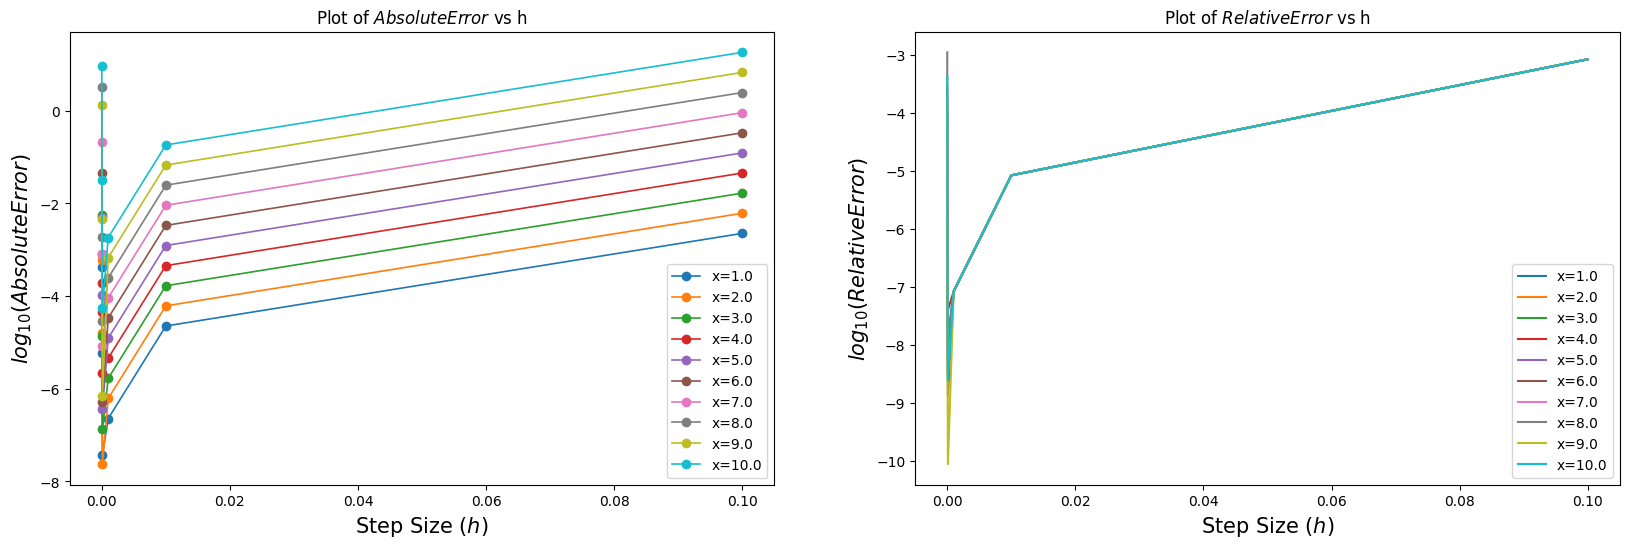

In [7]:
# plotting error and relative error vs h
fig, ax = plt.subplots(1,2,figsize=(20,6), dpi=100)
for i in range(len(X)):
    ax[0].plot(H,np.log10(er_array[i]) ,label=index_val[i], marker='o', lw=1.2)
    ax[1].plot(H,np.log10(rel_array[i]),label=index_val[i])


ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Step Size $(h)$", fontsize=15);
ax[1].set_xlabel("Step Size $(h)$", fontsize=15);
ax[0].set_ylabel("$log_{10}(Absolute Error)$", fontsize=15);
ax[1].set_ylabel("$log_{10}(Relative Error)$", fontsize=15);
ax[0].set_title("Plot of $Absolute Error$ vs h")
ax[1].set_title("Plot of $Relative Error$ vs h");
plt.savefig('error_vs_h.jpg', bbox_inches='tight', dpi=200)

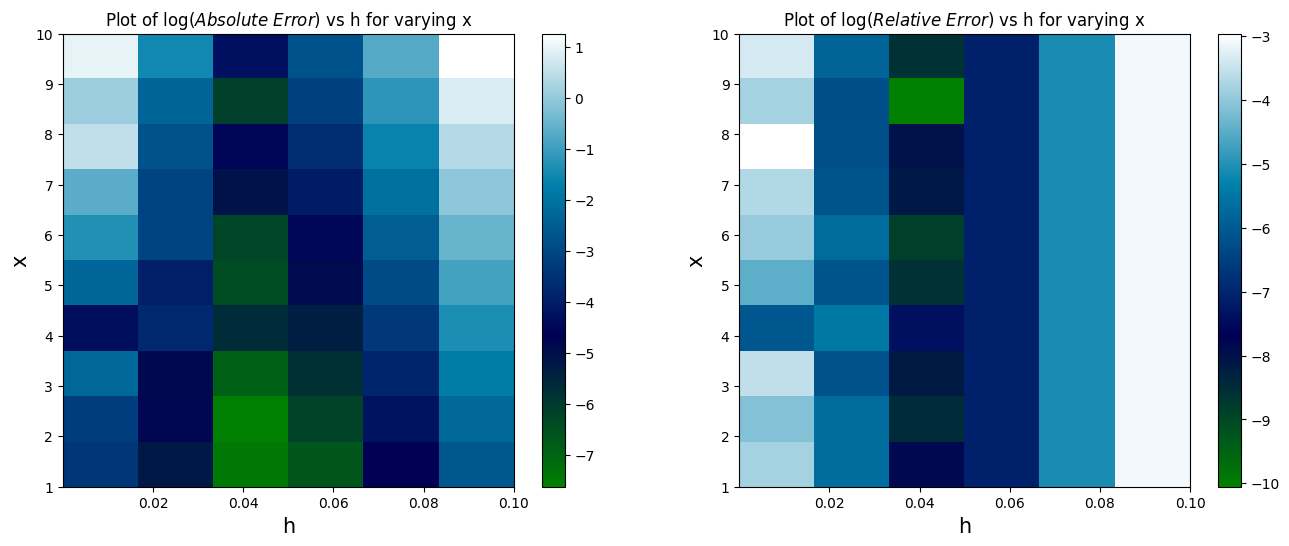

In [8]:
#showing image of er_array and rel_array for dereming optimal h
fig, ax = plt.subplots(1,2,figsize=(16,6), dpi=100)
im0 = ax[0].imshow(np.log10(np.array(er_array)),cmap='ocean',origin='lower',
            extent=[1e-6,1e-1,1,10], aspect='auto')

im1 = ax[1].imshow(np.log10(np.array(rel_array)),cmap='ocean',origin='lower',
            extent=[1e-6,1e-1,1,10], aspect='auto')
plt.colorbar(im0, ax=ax[0]);
plt.colorbar(im1, ax=ax[1]);

#formatting the output
ax[0].set_title("Plot of log($Absolute~Error$) vs h for varying x")
ax[1].set_title("Plot of log($Relative~Error$) vs h for varying x");
ax[0].set_ylabel('x',fontsize=15)
ax[1].set_xlabel('h',fontsize=15)
ax[0].set_xlabel('h',fontsize=15)
ax[1].set_ylabel('x',fontsize=15)

plt.savefig('error_vs_h_image.jpg', bbox_inches='tight', dpi=200)

From the above line plots we see that error is the least for `h=1e-4`.      
Also from the image of the error array, we see that error is the least in the 3rd column from the left, which corresponds to `h=1e-4`.      

Thus the optimal value of ***h*** is `h=1e-4`